# Ford Bike Share Analysis - Udacity Project
## by Nicholas Drake

## Preliminary Wrangling

This data set is from Ford GoBike, which is a bike sharing service located in the Bay Area. It is a full-service bike sharing system that allows patrons to rent bikes right from the bike station. Bikes are available for use 4 hours/day, 7 days/week, 365 days/year. Riders also have access to all bikes in the network when they become a member or purchase a pass. When a patron becomes a member, their rides will include their gender and birth year. All these data points make for an interesting project and I look forward to sharing my findings. Let's begin! 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import matplotlib.ticker as tick
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Dataset Overview
Before we dive deep into the data, let's first take a high-level oreview of the dataset.

In [2]:
# Load data into dataframe
fordbike = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
# high-level overview of data shape and composition
print(fordbike.shape)
print(fordbike.dtypes)
fordbike.head(10)

(519700, 15)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female
5,9226,2017-12-31 22:51:00.9180,2018-01-01 01:24:47.1660,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1487,Customer,NaN,NaN
6,4507,2017-12-31 23:49:28.4220,2018-01-01 01:04:35.6190,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991.0,Female
7,4334,2017-12-31 23:46:37.1960,2018-01-01 00:58:51.2110,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,1503,Customer,NaN,NaN
8,4150,2017-12-31 23:37:07.5480,2018-01-01 00:46:18.3080,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3125,Customer,NaN,NaN
9,4238,2017-12-31 23:35:38.1450,2018-01-01 00:46:17.0530,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,2543,Customer,NaN,NaN


### What is the structure of your dataset?

* Trip Duration (seconds)
* Start Time and Date
* End Time and Date
* Start Station ID
* Start Station Name
* Start Station Latitude
* Start Station Longitude
* End Station ID
* End Station Name
* End Station Latitude
* End Station Longitude
* Bike ID
* User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
* Member Year of Birth
* Member Gender

### Create new column for ride duratoin in minutes

In [6]:
# Create new column for trip duration in minutes
fordbike['duration_min'] = fordbike['duration_sec']/60

In [7]:
# Check changes
fordbike.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,duration_min
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,1335.166667
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,1313.333333
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,762.800000
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,1036.200000
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,726.716667
5,9226,2017-12-31 22:51:00.9180,2018-01-01 01:24:47.1660,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1487,Customer,NaN,NaN,153.766667
6,4507,2017-12-31 23:49:28.4220,2018-01-01 01:04:35.6190,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991.0,Female,75.116667
7,4334,2017-12-31 23:46:37.1960,2018-01-01 00:58:51.2110,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,1503,Customer,NaN,NaN,72.233333
8,4150,2017-12-31 23:37:07.5480,2018-01-01 00:46:18.3080,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3125,Customer,NaN,NaN,69.166667
9,4238,2017-12-31 23:35:38.1450,2018-01-01 00:46:17.0530,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,2543,Customer,NaN,NaN,70.633333


In [8]:
# View descriptive stats of ride time in minutes
fordbike['duration_min'].describe(percentiles = [.25, .5, .75, .9, .95, .99, .999])

count    519700.000000
mean         18.316825
std          57.402441
min           1.016667
25%           6.366667
50%           9.933333
75%          15.633333
90%          25.033333
95%          37.316667
99%         188.983500
99.9%      1008.681717
max        1439.483333
Name: duration_min, dtype: float64

## Univariate Exploration

### Let's first look a the duration of bike rides in minutes

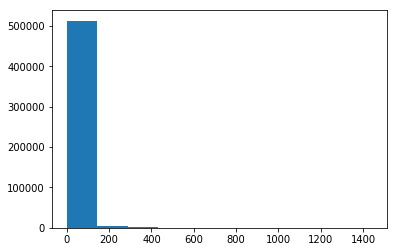

In [9]:
# univariate plot of diamond prices
plt.hist(data = fordbike, x = 'duration_min');

> This histogram looks strange since it is zoomed out to far. Let's fix that, as well as add labels.

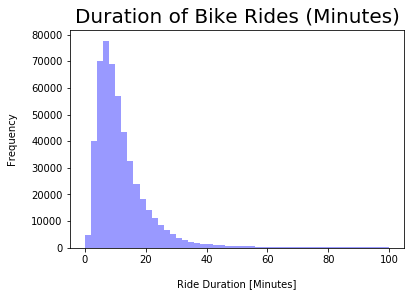

In [12]:
sb.distplot(fordbike['duration_min'], kde = False, color = 'b', hist_kws = {"range": [0, 100]})
plt.title("Duration of Bike Rides (Minutes)", fontsize = 20, y = 1.01);
plt.xlabel("Ride Duration [Minutes]", labelpad = 14)
plt.ylabel("Frequency", labelpad = 14);

> After zooming in, you can see that the duration of bike rides is skewed to the right. The highest occurrence of bike rides are around 10 minutes.
> Most bike rides are from 3-15 minutes long, which could be considered a short ride. This shows that most riders do not use the bikes for long distance, but instead travel short distances.

### Next, let's take a look at the age of bike members

In [19]:
# Create new cloumn for age in years
fordbike['member_age'] = 2017 - fordbike['member_birth_year']

In [20]:
# get stats for age
fordbike['member_age'].describe(percentiles = [.1, .2, .3, .4, .5, .6, .7, .75, .8, .9, .95])

count    453159.000000
mean         36.595213
std          10.513488
min          18.000000
10%          25.000000
20%          28.000000
30%          30.000000
40%          32.000000
50%          34.000000
60%          37.000000
70%          40.000000
75%          43.000000
80%          45.000000
90%          52.000000
95%          56.000000
max         131.000000
Name: member_age, dtype: float64

> With the above data, we can see that the 19 is the youngest rider age and the oldest is 119. That seems a little old to be riding a bike, which could mean that a member entered their birth year incorrectly, but good for them if the age is correct!

In [23]:
# Member only data
df_age_members = fordbike[fordbike['member_age'].notnull()]['member_age']

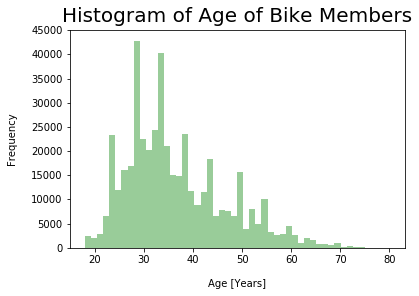

In [24]:
sb.distplot(df_age_members, color = 'g', kde = False, hist_kws = {"range": [18, 80]})
plt.title("Histogram of Age of Bike Members", fontsize = 20, y = 1.01)
plt.xlabel("Age [Years]", labelpad = 14)
plt.ylabel("Frequency", labelpad = 14);

> There is a wide range of bike members from ages 19-70+ with the peak around 28.
> The graph shows that the most frequent age group of riders is between 23-38 years old.
> Past the age of 50, as people get older, they are less likely to be a member of the bike share program. There are still several thousand members over age of 50.

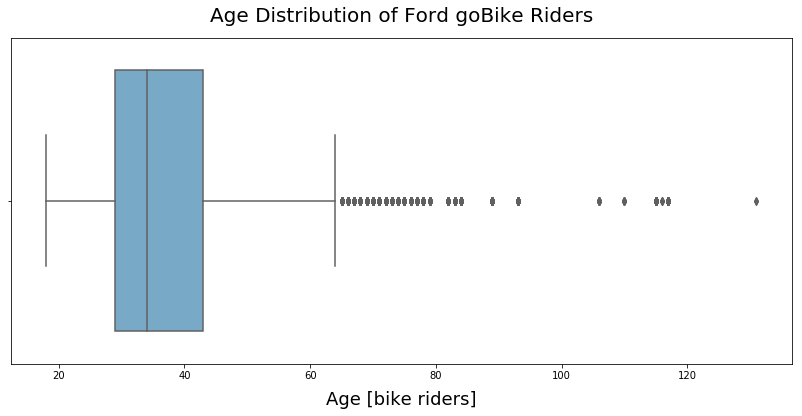

In [54]:
plt.figure(figsize=(14,6))
sb.boxplot(data = fordbike, x ='member_age', palette='Blues', orient='h')
plt.title("Age Distribution of Ford goBike Riders", fontsize=20, y=1.03)
plt.xlabel("Age [bike riders]", fontsize=18, labelpad=10)
plt.savefig('image01.png');

> The box plot shows that ages from 18 to 56 takes 95% of the users.

## Bivariate Exploration
In this section, we will be looking at the memeber's age and gender compared to the percentage of rides taken.

In [27]:
# Total Ride
nrides = fordbike['bike_id'].sum()
print('There are a total of {} rides in 2017.'.format(nrides))

There are a total of 869215441 rides in 2017.


In [28]:
# Members 60 years old or younger
fordbike2 = fordbike[fordbike['member_age']<=60]
fordbike2['member_age'].mean()

35.77518599849977

In [29]:
fordbike2['member_age_bins'] = fordbike['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

In [30]:
fordbike2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,duration_min,member_age,member_age_bins
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,1335.166667,30.0,20 - 30
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,1313.333333,52.0,50 - 60
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,726.716667,20.0,10 - 20
6,4507,2017-12-31 23:49:28.4220,2018-01-01 01:04:35.6190,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991.0,Female,75.116667,26.0,20 - 30
12,2183,2017-12-31 23:52:55.5810,2018-01-01 00:29:18.7430,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990.0,Male,36.383333,27.0,20 - 30


In [31]:
trip_by_age_df = fordbike2.groupby('member_age_bins').agg({'bike_id':'count'})

In [32]:
trip_by_age_df['perc'] = (trip_by_age_df['bike_id']/trip_by_age_df['bike_id'].sum())*100

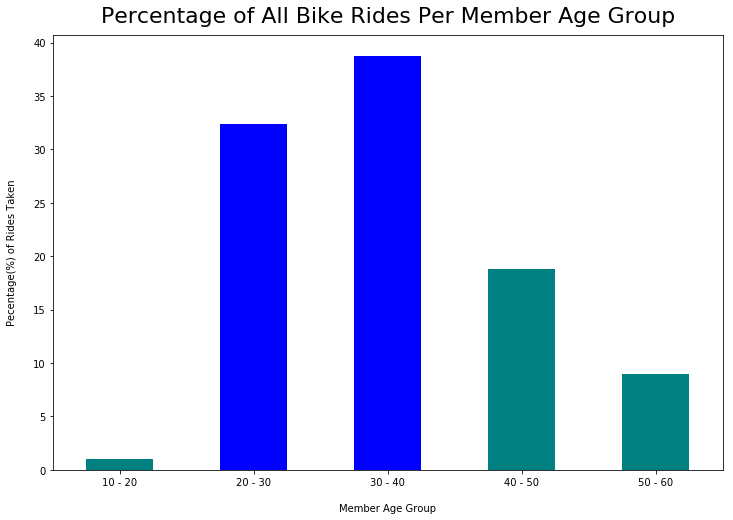

In [43]:
new_color = ['teal', 'blue', 'blue', 'teal', 'teal']
trip_by_age_df['perc'].plot(kind = 'bar', color = new_color, figsize = (12,8))
plt.title('Percentage of All Bike Rides Per Member Age Group', fontsize = 22, y = 1.015)
plt.xlabel('Member Age Group', labelpad = 16)
plt.ylabel('Pecentage(%) of Rides Taken', labelpad = 16)
plt.xticks(rotation = 360)
plt.savefig('image05.png');

> The graph shows that members from 20 to 40 years old took more than 70% of bike rides. Of those bike rides, 30 to 40 year old took around 40% of bike rides.

### Bike Riders by Gender

In [34]:
trip_by_gender_df = fordbike.groupby('member_gender').agg({'bike_id':'count'})

In [35]:
trip_by_gender_df['perc'] = (trip_by_gender_df['bike_id']/trip_by_gender_df['bike_id'].sum())*100

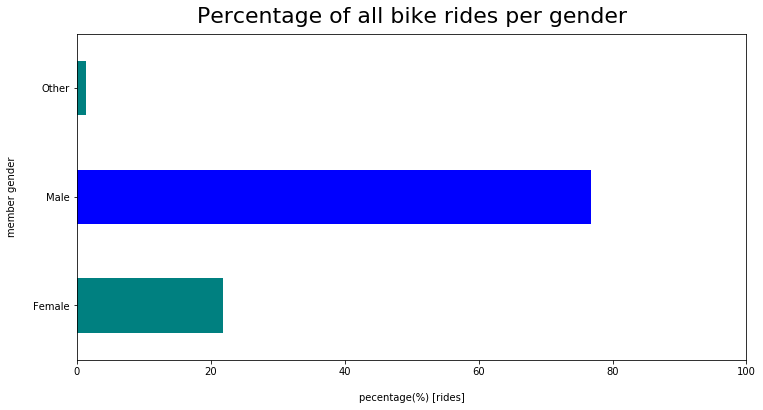

In [44]:
new_color = ['teal', 'blue', 'teal']
trip_by_gender_df['perc'].plot(kind = 'barh', color = new_color, figsize = (12,6))
plt.title('Percentage of all bike rides per gender', fontsize = 22, y = 1.015)
plt.ylabel('member gender', labelpad = 16)
plt.xlabel('pecentage(%) [rides]', labelpad = 16)
plt.xticks(rotation = 360)
plt.xlim(0, 100)
plt.savefig('image06.png');

> Male bike riders are the majority of bike riders being around 75%. Female bike riders are around 25%.

## Multivariate Exploration
Lastly, let us look at monthly trends by user type.

In [45]:
# Create new column 
fordbike['start_time']= pd.to_datetime(fordbike['start_time'])
fordbike['end_time']= pd.to_datetime(fordbike['end_time'])

In [46]:
# Create new column for start/end time date (yyyy-mm-dd)
fordbike['start_time_date'] = fordbike['start_time'].dt.date
fordbike['end_time_date'] = fordbike['end_time'].dt.date

In [47]:
# Create new column for start/end time month (mm-dd)
fordbike['start_time_year_month'] = fordbike['start_time'].map(lambda x: x.strftime('%Y-%m'))
fordbike['end_time_year_month']= fordbike['end_time'].map(lambda x: x.strftime('%Y-%m'))

In [48]:
# Create new column for start time month (yy-mm)
fordbike['start_time_year_month_renamed'] = fordbike['start_time'].dt.strftime('%y' + '-' + '%m')

In [49]:
fordbike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,duration_min,member_age,start_time_date,end_time_date,start_time_year_month,end_time_year_month,start_time_year_month_renamed
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,Customer,1987.0,Male,1335.166667,30.0,2017-12-31,2018-01-01,2017-12,2018-01,17-12
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,...,Customer,1965.0,Female,1313.333333,52.0,2017-12-31,2018-01-01,2017-12,2018-01,17-12
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,...,Customer,NaN,NaN,762.800000,NaN,2017-12-31,2018-01-01,2017-12,2018-01,17-12
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,...,Customer,NaN,NaN,1036.200000,NaN,2017-12-31,2018-01-01,2017-12,2018-01,17-12
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,...,Subscriber,1997.0,Female,726.716667,20.0,2017-12-31,2018-01-01,2017-12,2018-01,17-12


In [50]:
user_type_count_per_year_df = fordbike.groupby(["start_time_year_month_renamed", "user_type"]).size().reset_index()

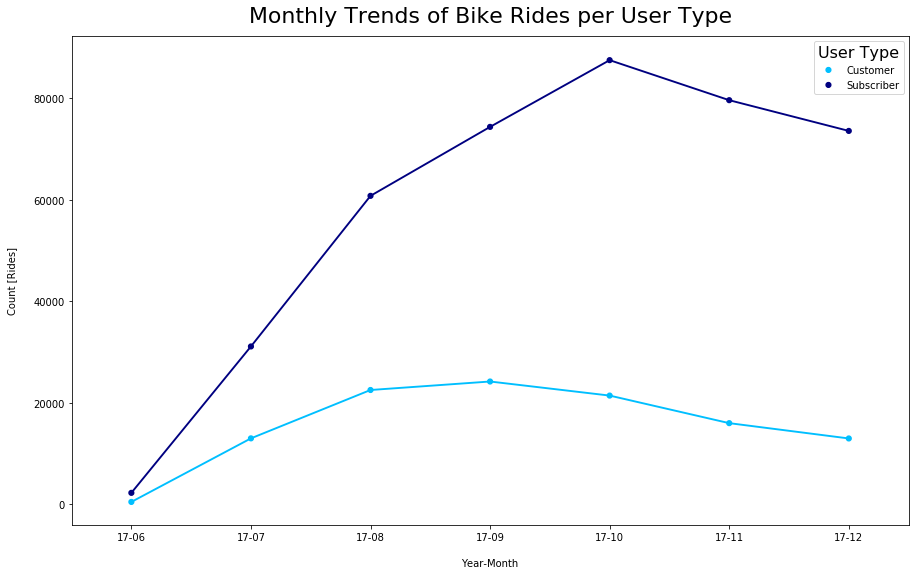

In [53]:
plt.figure(figsize=(15,9))
my_palette = {'Subscriber':'navy', 'Customer':'deepskyblue'}
ax = sb.pointplot(x='start_time_year_month_renamed', y=0, hue='user_type', palette=my_palette, scale=.7, data=user_type_count_per_year_df)
plt.title('Monthly Trends of Bike Rides per User Type', fontsize=22, y=1.015)
plt.xlabel('Year-Month', labelpad=16)
plt.ylabel('Count [Rides]', labelpad=16)
leg = ax.legend()
leg.set_title('User Type',prop={'size':16})
ax = plt.gca()
plt.savefig('image09.png');

> The graph above shows that there is a steady increase in bike rides from June to September 2017. Subscribers have much more rides, which is partially due to them having unlimited rides. 
> Both user types rides decrease around the month of October, which is probably due to cooler weather temperature. This decrease is seen in November and December as well.